In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# Preprocessing
df['Car_Age'] = 2024 - df['Year']  # Calculate car age
df = df.drop(['Year'], axis=1)  # Drop irrelevant columns


In [5]:
# Droping columns that arent needed
columns_to_drop = ['Seller_Type']
df = df.drop(columns_to_drop, axis=1)
df = df.copy()
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Manual,0,10


In [6]:
#finding missing values
df.isna().mean()

Car_Name         0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Transmission     0.0
Owner            0.0
Car_Age          0.0
dtype: float64

In [7]:

df.dtypes

Car_Name          object
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Transmission      object
Owner              int64
Car_Age            int64
dtype: object

In [8]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [9]:
df['Car_Company'] = df['Car_Name'].str.split().str[0]
df_copy= df.copy()
print(df_copy['Car_Company'].unique())

['ritz' 'sx4' 'ciaz' 'wagon' 'swift' 'vitara' 's' 'alto' 'ertiga' 'dzire'
 'ignis' '800' 'baleno' 'omni' 'fortuner' 'innova' 'corolla' 'etios'
 'camry' 'land' 'Royal' 'UM' 'KTM' 'Bajaj' 'Hyosung' 'Mahindra' 'Honda'
 'Yamaha' 'TVS' 'Hero' 'Activa' 'Suzuki' 'i20' 'grand' 'i10' 'eon' 'xcent'
 'elantra' 'creta' 'verna' 'city' 'brio' 'amaze' 'jazz']


In [10]:
columns_to_drop = ['Car_Name']
df = df_copy.drop(columns_to_drop, axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Car_Age,Car_Company
0,3.35,5.59,27000,Petrol,Manual,0,10,ritz
1,4.75,9.54,43000,Diesel,Manual,0,11,sx4
2,7.25,9.85,6900,Petrol,Manual,0,7,ciaz
3,2.85,4.15,5200,Petrol,Manual,0,13,wagon
4,4.60,6.87,42450,Diesel,Manual,0,10,swift


In [11]:
df['CarCompany'] = df['Car_Company'].replace({'ritz': 'hint', 'nissan': 'Nissan', 'i20': 'hyundai', 'i10': 'hyundai', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [12]:
categorical_col = df.select_dtypes(include=['object']).columns
numerical_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[categorical_col]
df_num = df[numerical_col]
print("Categorical columns = ", categorical_col)
print("Numerical columns = ", numerical_col)

Categorical columns =  Index(['Fuel_Type', 'Transmission', 'Car_Company', 'CarCompany'], dtype='object')
Numerical columns =  Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age'], dtype='object')


In [36]:
# we will use the 3 most correlated value aka engine size
column = ['Car_Age','Present_Price', 'Kms_Driven','Owner']
multivaiate_dataset = df[column]
multivariate_y = df['Selling_Price']

# splitting
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(multivaiate_dataset, multivariate_y, test_size=0.2)

# model
from sklearn.linear_model import LinearRegression
model = RandomForestRegressor(random_state=70)
model.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = model.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = mse2 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse2}")
r2_2 = r2_score(y_test2, y_pred2)
print(f"R2 score value is {r2_2}")


# Optionally, you can also access the coefficients and intercept of the model


Root Mean Squared Error (RMSE): 0.9993243725834698
R2 score value is 0.9307090799050872


Text(0, 0.5, 'y_pred')

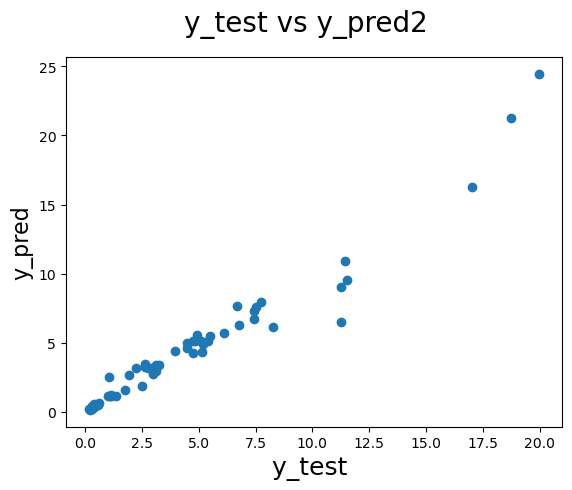

In [33]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test2,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

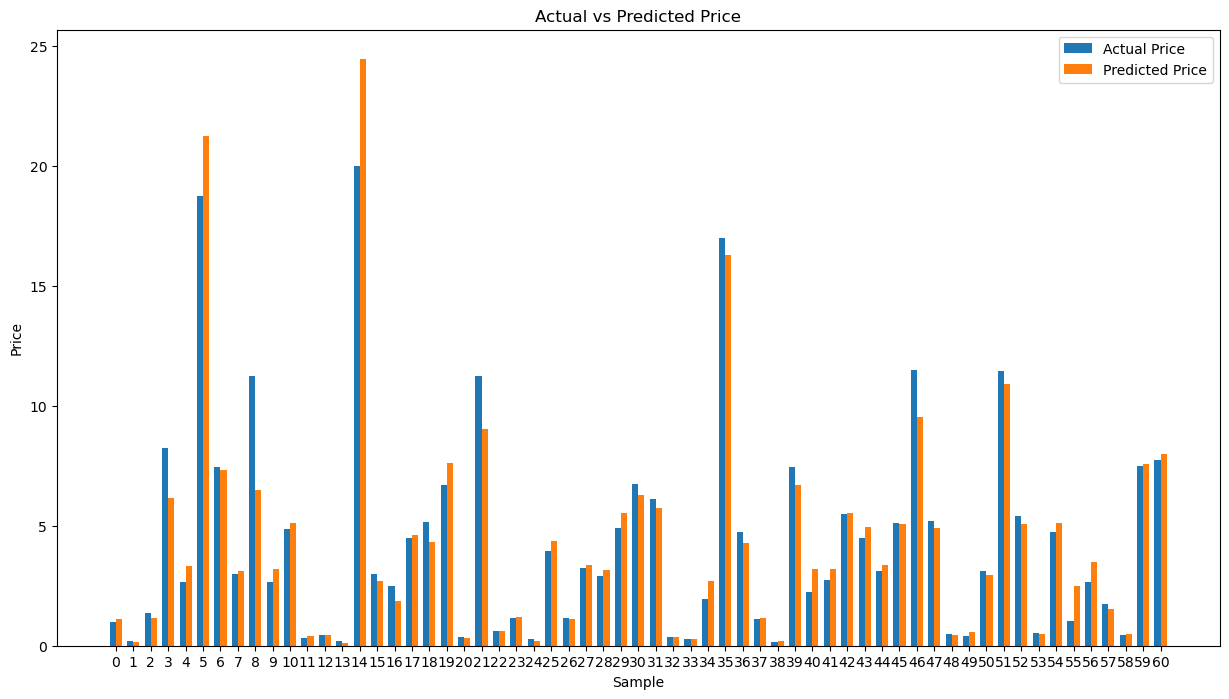

In [34]:
import matplotlib.pyplot as plt
import numpy as np



# Calculate the number of samples
num_samples = len(y_test2)

# Generate an array of indices for the x-axis
x_indices = np.arange(num_samples)

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(15,8))

# Plot the actual prices
plt.bar(x_indices, y_test2, width=bar_width, label='Actual Price')

# Plot the predicted prices
plt.bar(x_indices + bar_width, y_pred2, width=bar_width, label='Predicted Price')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()

# Adjust the x-axis ticks
plt.xticks(x_indices + bar_width / 2, x_indices)

# Show the plot
plt.show()
